# DSE 315 - RED WINE QUALITY ANALYSIS USING DATA SCIENCE AND ML

NAME : VISHAL VIJAY GHULE

ROLL NO. : 20117

DEPARTMENT : CHEMISTRY

COURSE : DATA SCIENCE IN PRACTICE, AUGUST-DECEMBER 2022

#   OVERVIEW

To  determine which physicochemical properties, make a wine good by examine the(fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide,total sulfur dioxide, density, pH, sulphates, and alcohol) and quality of wine by using Multiple Linear Regression method. 

Input Variables:

- **fixed acidity**:  most acids involved with wine or fixed or nonvolatile
- **volatile acidity**:  the amount of acetic acid in wine
- **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines 
- **residual sugar**: the amount of sugar remaining after fermentation stops
- **chlorides**: the amount of salt in the wine
- **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- **total sulfur dioxide**: amount of free and bound forms of S02
- **density**: the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- **alcohol**: the percent alcohol content of the wine<br>

Output Variable:
- **quality**:  output variable (based on sensory data, score between 0 and 10)

# RESEARCH QUESTION

1) Is there significant difference in acidity in good and bad wine?

2) Is there significant difference in sulphates concentration in good and bad wine?

3) Is there significant difference in alcohol concentration in good and bad wine?

# BACKGROUND AND PRIOR WORK

Nowadays people try to lead a luxurious life.They tend to use the things either for show off or for their dailybasis. These days the consumption of red wine is very common to all. So this research basically deals with the quality prediction
of the red wine using its various attributes. Dataset is taken from the sources and the techniques such as Random Forest,
Support Vector Machine and Naïve Bayes are applied. Various performance measures are calculated and the results are compared among training set and testing set and accordingly the best out of the three techniques depending on the training set results is predicted. 

References :

1) https://www.researchgate.net/publication/341812162_Red_Wine_Quality_Prediction_Using_Machine_Learning_Techniques

2) https://www.kaggle.com/code/tolgahancepel/red-wine-quality-classification-analysis-eda/notebook

3) https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46

4) P.   Cortez, A.   Cerderia, F.   Almeida, T.   Matos, and J.   Reis, “Modelling wine preferences by data  mining  from physicochemical properties,” In Decision SupportSystems, Elsevier, 47 (4): 547-553. ISSN: 0167-9236.


# HYPOTHESIS

• H1: Fixed acidity is significantly contributed to the quality of wine.

• H2: pH is significantly to the contributed to the quality of wine. 

• H3: Residual sugar is contributed to the quality of wine

# DATASET(S)

**Dataset Name**: Red Wine Quality Analysis

**Link of the Dataset**: https://www.kaggle.com/code/tolgahancepel/red-wine-quality-classification-analysis-eda

**Number of Observations**:1600 x 12

**Description of the Dataset**:
    
This dataset provides information about the red wine samples from the north of Portugal to model red wine quality based on physicochemical tests.

We can use this dataset for regression as well as classification. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

In order to use it for classification, all you need to do is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

Knowing how each variable will impact the red wine quality will help producers, distributors, and businesses in the red wine industry better assess their production, distribution, and pricing strategy.


#  SETUP 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\hp\AppData\Local\Temp\ipykernel_23828\2768787513.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
dataset = pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#  DATA CLEANING

Let's check if there is any missing data 

In [4]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Therefore , there is no missing data in the entire dataset.

In [5]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

In [6]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['quality'] = labelencoder_y.fit_transform(dataset['quality'])

In [8]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# DESCRIPTIVE DATA ANALYSIS

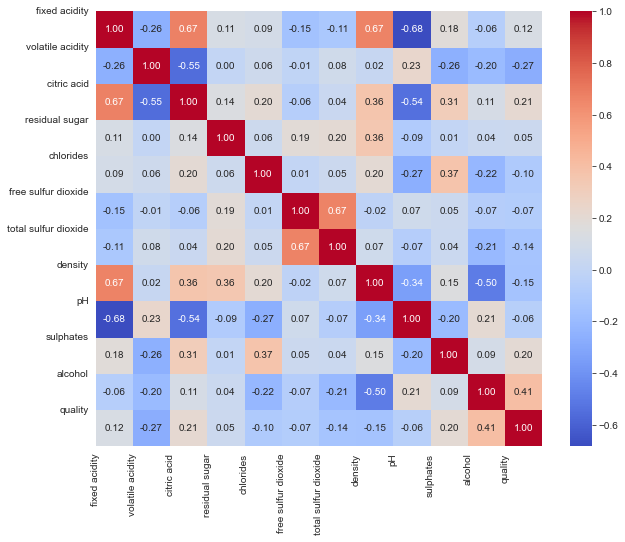

In [9]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


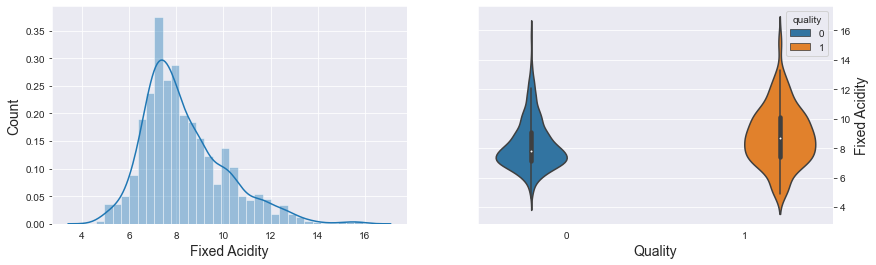

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['fixed acidity'], ax = axes[0])
axes[0].set_xlabel('Fixed Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'fixed acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


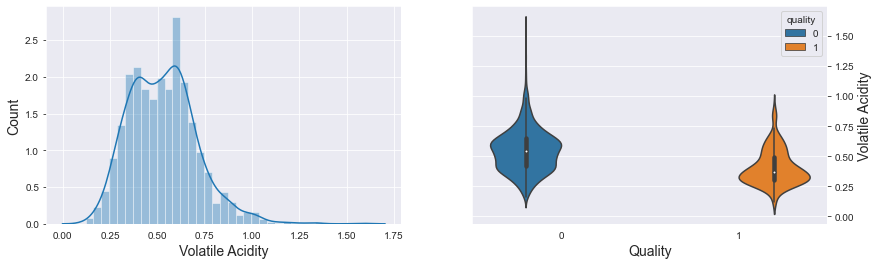

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['volatile acidity'], ax = axes[0])
axes[0].set_xlabel('Volatile Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Volatile Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


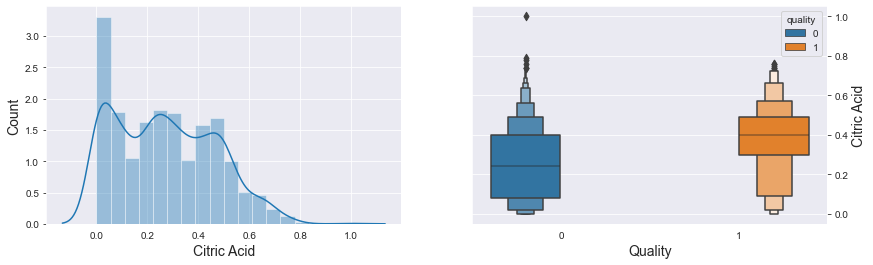

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['citric acid'], ax = axes[0])
axes[0].set_xlabel('Citric Acid', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'citric acid', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Citric Acid', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


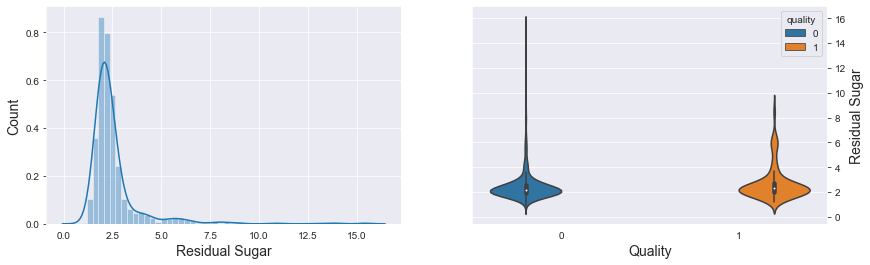

In [13]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Residual Sugar', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


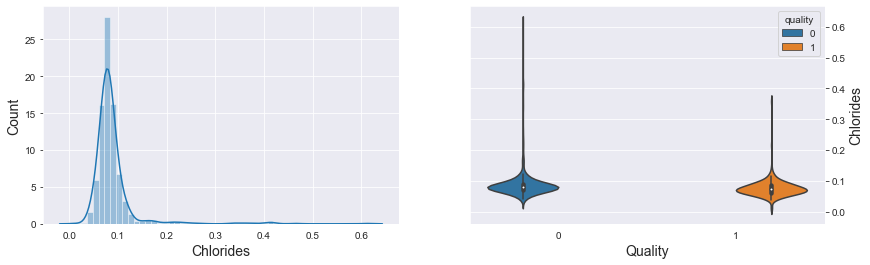

In [14]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Chlorides', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


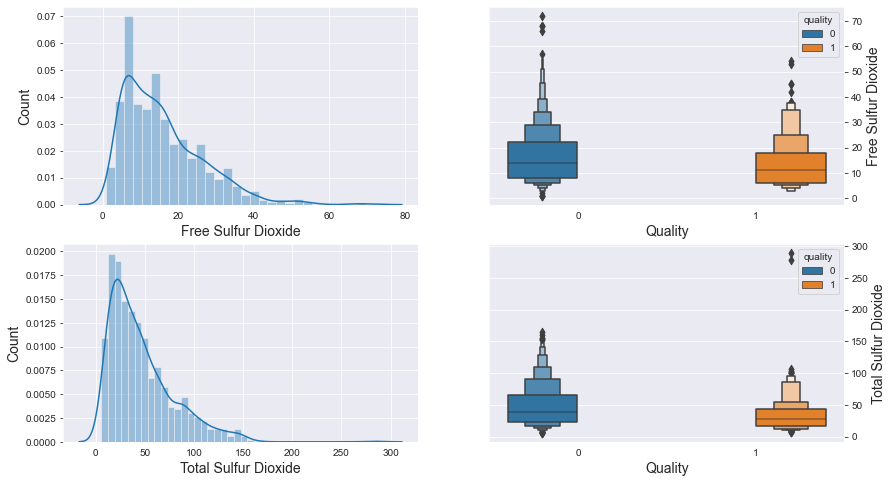

In [15]:
f, axes = plt.subplots(2,2,figsize=(14,8))

sns.distplot(dataset['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes[0,0].set_ylabel('Count', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.distplot(dataset['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes[1,0].set_ylabel('Count', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


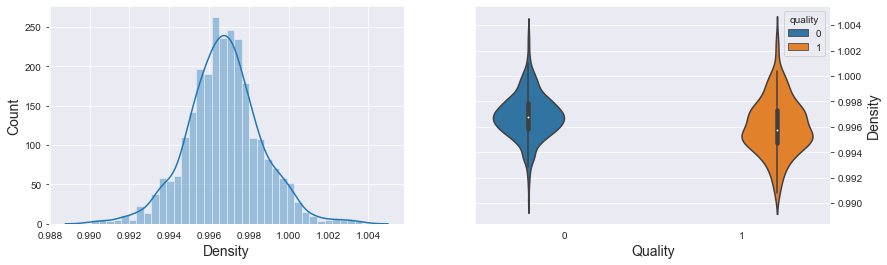

In [16]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


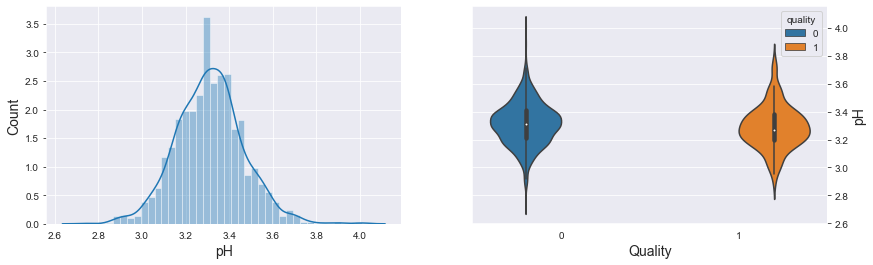

In [17]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


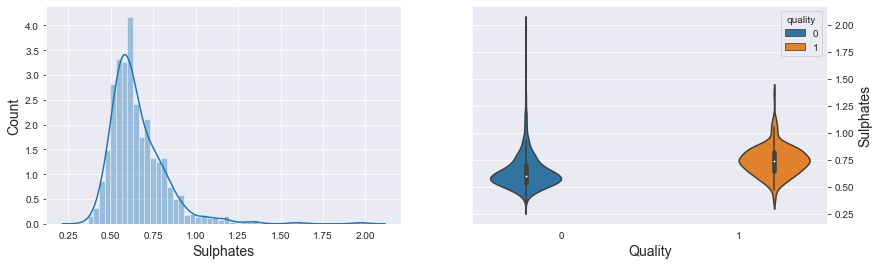

In [18]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulphates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


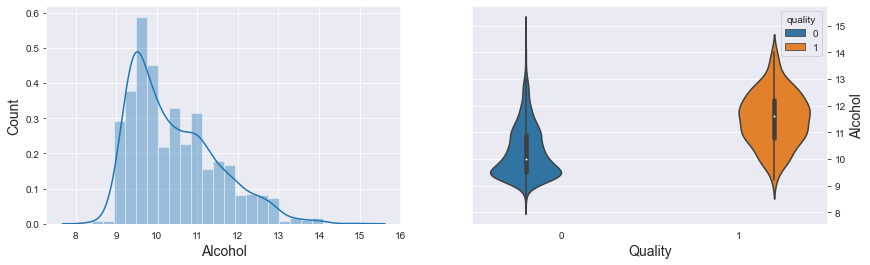

In [19]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['alcohol'], ax = axes[0])
axes[0].set_xlabel('Alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Alcohol', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [20]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [21]:
X = dataset.drop('quality', axis = 1).values
y = dataset['quality'].values.reshape(-1,1)

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


# EXPLORATORY DATA ANALYSIS

###  Classification Models 

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

###  Logistic Regression 

In [25]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [26]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.885857529527559
Training set:  0.8858483189992181
Test set:  0.865625


In [27]:
confusion_matrix(y_test, y_pred_lr_test)

array([[264,   9],
       [ 34,  13]], dtype=int64)

In [28]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

###  K-Nearest Neighbors (K-NN) 

In [29]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [30]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9022699311023622
Training set:  1.0
Test set:  0.89375


In [31]:
confusion_matrix(y_test, y_pred_knn_test)

array([[264,   9],
       [ 25,  22]], dtype=int64)

In [32]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

###  Support Vector Machine (SVM - Linear) 

In [33]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())

SVC(kernel='linear')

In [34]:
# Predicting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

CV:  0.8670829232283465
Training set:  0.8670836591086787
Test set:  0.853125


In [35]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[273,   0],
       [ 47,   0]], dtype=int64)

In [36]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

###  Support Vector Machine (SVM - Kernel) 

In [37]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train_scaled, y_train.ravel())

SVC(C=10)

In [38]:
# Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train_scaled)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test_scaled)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.8999261811023622
Training set:  0.9421422986708365
Test set:  0.89375


In [39]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[261,  12],
       [ 22,  25]], dtype=int64)

In [40]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

###  Naive Bayes 

In [41]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_scaled, y_train.ravel())

GaussianNB()

In [42]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.8373462106299213
Training set:  0.8389366692728695
Test set:  0.846875


In [43]:
confusion_matrix(y_test, y_pred_nb_test)

array([[234,  39],
       [ 10,  37]], dtype=int64)

In [44]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

###  Decision Tree Classification 

In [45]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [46]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8960014763779528
Training set:  1.0
Test set:  0.878125


In [47]:
confusion_matrix(y_test, y_pred_dt_test)

array([[252,  21],
       [ 18,  29]], dtype=int64)

In [48]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

# PREDICTION DATA ANALYSIS

###  Random Forest Classification 

In [49]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [50]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9140194389763779
Training set:  1.0
Test set:  0.9125


In [51]:
confusion_matrix(y_test, y_pred_rf_test)

array([[267,   6],
       [ 22,  25]], dtype=int64)

In [52]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

###   Measuring The Error 

In [53]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean()),
          ('SVM (Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean()),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [54]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,264,9,13,34,0.885848,0.865625,0.885858
1,K-Nearest Neighbors (KNN),264,9,22,25,1.000000,0.893750,0.902270
2,SVM (Linear),273,0,0,47,0.867084,0.853125,0.867083
3,SVM (Kernel),261,12,25,22,0.942142,0.893750,0.899926
4,Naive Bayes,234,39,37,10,0.838937,0.846875,0.837346
5,Decision Tree Classification,252,21,29,18,1.000000,0.878125,0.896001
6,Random Forest Tree Classification,267,6,25,22,1.000000,0.912500,0.914019


###  Visualizing Models Performance 

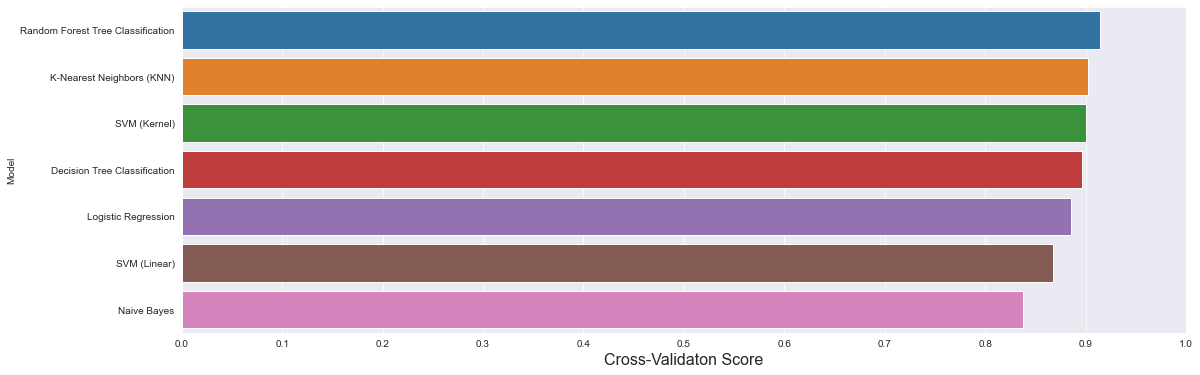

In [55]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

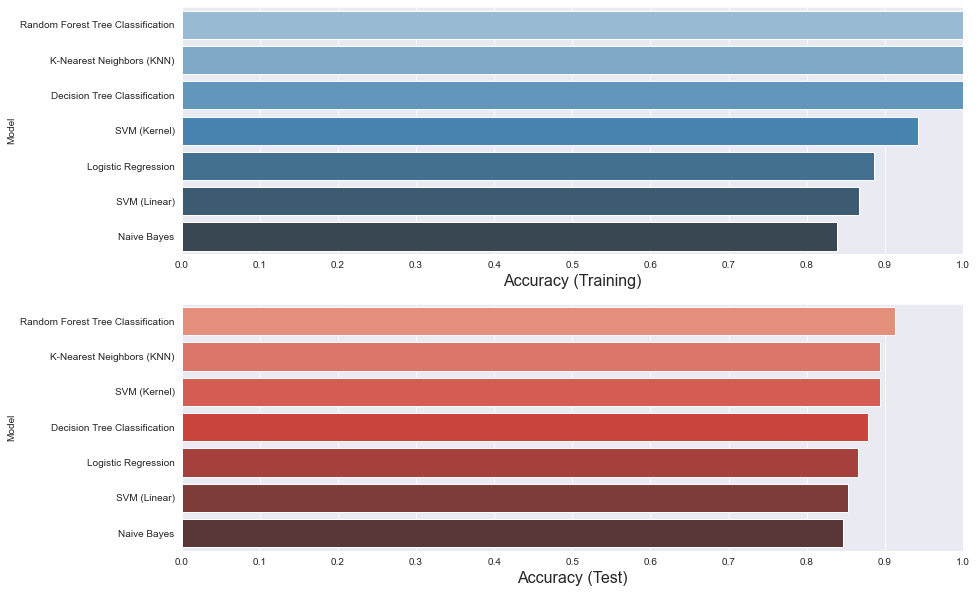

In [56]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

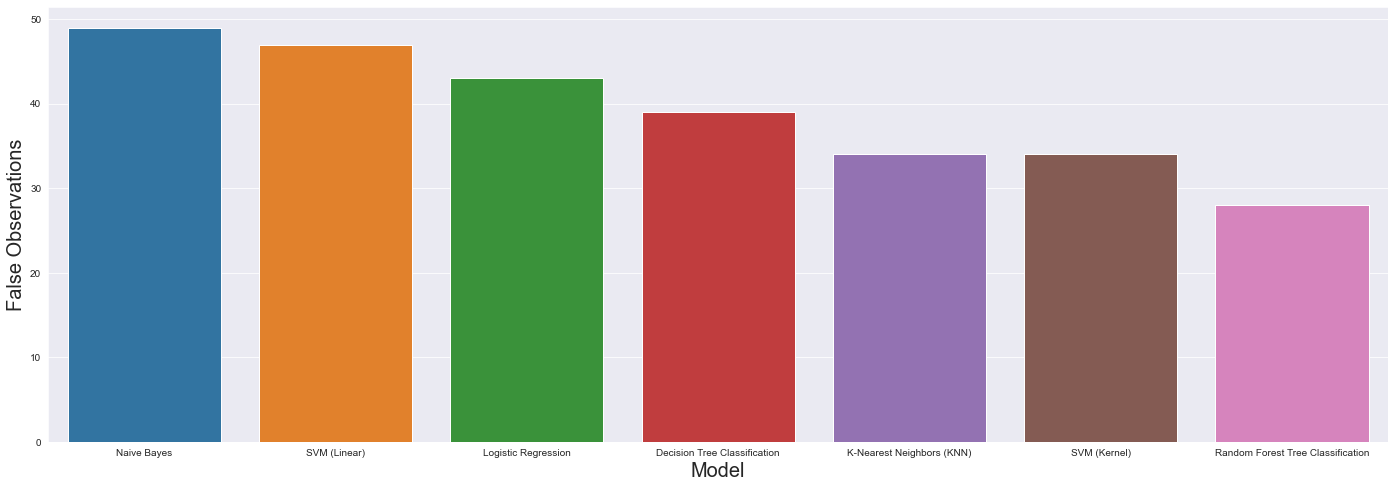

In [57]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

# CONCLUSION

In this kernel, I have built 7 classification models using Red Wine Quality Dataset. These are logistic, k-nn, svm(linear), svm(kernel), naive bayes, decision tree and random forest classification. Then measured and visualized the performance of the models. 

The purpose of this study is to determine the best quality of the red wine by analysing their alcohol, volatile acidity,   sulphates,   total_sulfurdioxide,   chlorides,   pH,   and free_sulfurdioxode. Currently, many new competitors in wine industry. Hence, this study was to aid the company in assessing and improving the red wine quality so that they may adjustand redefine their goals.

Based on the analysis for multiple linear regression methods of data analysis, indicated that only alcohol, volatile acidity,   sulphates, total_sulfurdioxide, chlorides, pH, and free_sulfurdioxide are significantly contribute to the quality of red whichare considered as an important aspect for developing a best quality of wine, 35.9% indicatingthat 35.9% percent of the total variation in the quality of red wine is explained by the independent variable while 64.1% is explained by the other factor that is not included in the model. Since the multiple correlation coefficient is more than 0.5 it indicates that there exists a strong positive linear relationship between independent and dependent respectively. 

The overall result, this research proved that the significant variables are useful to predict the quality of the red wine. This proves that quality of red wine can be improved by looking at the  alcohol, volatile acidity, sulphates, total_sulfurdioxide, chlorides, pH, andfree_sulfurdioxode. In summary, quality of red wine is affected from various It is necessaryto perform additional research from different perspectives in order to identify more predictor variables of quality of red wine.